<a href="https://colab.research.google.com/github/sharanyaa31/Training-datasets/blob/main/adopted_user%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
import scipy.stats
import matplotlib.dates as mdates
import plotly.graph_objects as go
plt.style.use('bmh')


In [104]:
takehome_user = pd.read_csv("/takehome_users_copy.csv", encoding = "ISO-8859-1")
takehome_user.info()
takehome_user.drop_duplicates()
takehome_user.isnull().sum()
takehome_user.dtypes
takehome_user.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [3]:
takehome_user["invited_by_user_id"].fillna(-1, inplace=True)
conversion = {"creation_time" : "datetime64[ns]",
              "last_session_creation_time" : "datetime64[ns]",
              "invited_by_user_id" : "int64"
              }
takehome_user = takehome_user.astype(conversion, errors = "ignore")

takehome_user.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 937.6+ KB


In [107]:
takehome_user['last_session_creation_time'].min(), takehome_user['last_session_creation_time'].max()


(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [108]:
takehome_user['creation_time'].min(), takehome_user['creation_time'].max()


('2012-05-31 00:43:27', '2014-05-30 23:59:19')

In [109]:
takehome_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [110]:
user_eng = pd.read_csv("/takehome_user_engagement copy.csv")
user_eng.info()
user_eng.dtypes
user_eng.isnull().sum()
user_eng.drop_duplicates()
user_eng.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


# New Section

In [113]:
conversion = {"time_stamp" : "datetime64[ns]"}
user_eng = user_eng.astype(conversion, errors= "ignore")
user_eng.info()
user_eng.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [114]:
takehome_user['last_session_creation_time'] = pd.to_datetime(takehome_user['last_session_creation_time'] ,unit='s')


In [115]:
takehome_user.last_session_creation_time.dtypes


dtype('<M8[ns]')

In [116]:
takehome_user['last_session_creation_time'].min(), takehome_user['last_session_creation_time'].max()


(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [117]:
takehome_user['creation_time'].min(), takehome_user['creation_time'].max()


('2012-05-31 00:43:27', '2014-05-30 23:59:19')

to find out the users who logged in 3 seperate days in a week we use groupby and rolling methods


In [118]:
df = user_eng.copy()

In [119]:
df['date'] = pd.to_datetime(df['time_stamp'], utc = True,errors='coerce')



In [123]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()
  

In [124]:
df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')


In [122]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
visits_7_days,207917.0,4.381393,2.042666,1.0,3.0,4.0,6.0,7.0


In [125]:
df[df.visits_7_days >= 3.0]


,time_stamp,user_id,visited,date,visits_7_days
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04+00:00,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13 03:45:04+00:00,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19 22:08:03+00:00,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02 22:08:03+00:00,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05 22:08:03+00:00,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014-05-23 11:04:47+00:00,6.0
207899,2014-05-24 11:04:47,11988,1,2014-05-24 11:04:47+00:00,6.0
207900,2014-05-26 11:04:47,11988,1,2014-05-26 11:04:47+00:00,5.0
207901,2014-05-27 11:04:47,11988,1,2014-05-27 11:04:47+00:00,5.0


In [127]:
user_adopted = df.groupby('user_id')['visits_7_days'].max().reset_index()


create a column for adopted  user logged in >3 in a week.

In [128]:
user_adopted['adopted_user'] = user_adopted['visits_7_days'].apply(lambda x: 1 if x>=3 else 0)


In [129]:
user_adopted.head(20)

,user_id,visits_7_days,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0
5,6,1.0,0
6,7,1.0,0
7,10,7.0,1
8,11,1.0,0
9,13,1.0,0


In [130]:
user_adopted.adopted_user.value_counts()


0    7221
1    1602
Name: adopted_user, dtype: int64

In [131]:
user_adopted.drop('visits_7_days', axis = 1, inplace = True)
user_adopted.rename(columns={"user_id": "object_id"}, inplace=True)


In [132]:
user_adopted.set_index("object_id", inplace = True)


Joining the above _useradopted dataframe with the original users dataframe.



In [133]:
df_takehome_user = takehome_user.join(user_adopted, on = 'object_id', how='left')


In [134]:
df_takehome_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [135]:
#df_takehome_user['last_session_creation_time'].fillna(0, inplace = True )
df_takehome_user['adopted_user'].fillna(0, inplace = True)


In [136]:
df_takehome_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                12000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


In [137]:
df_takehome_user.invited_by_user_id.fillna(0, inplace=True)


*the* null values in the "adopted_user" will be 0 we can consider that those users haven't lagged in for 3 days

In [138]:
df_takehome_user[df_takehome_user.invited_by_user_id.isnull()].creation_source.unique()


array([], dtype=object)

In [139]:
df_takehome_user[~df_takehome_user.invited_by_user_id.isnull()].creation_source.unique()


array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [140]:
df_takehome_user.drop(['object_id', 'name', 'email'], axis = 1, inplace = True)


In [141]:
df_takehome_user.invited_by_user_id.fillna(0, inplace=True)


In [145]:
df_takehome_user['days_since_creation'] =  (user_eng.time_stamp.max()) - (df_takehome_user.creation_time)

TypeError: ignored

In [99]:
df_takehome_user['days_since_creation'] = (user_eng.time_stamp.max()) - (df_takehome_user. creation_time).dt.days


AttributeError: ignored

In [45]:
df_takehome_user.drop(['creation_time', 'last_session_creation_time'], axis = 1, inplace = True)


onehot encoding

In [46]:
df_takehome_user = pd.get_dummies(df_takehome_user, columns=['creation_source'])


In [47]:
df_takehome_user.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
invited_by_user_id,12000.0,3188.226083,3869.411178,-1.0,-1.0,875.0,6317.00,11999.0
adopted_user,6349.0,0.180028,0.384241,0.0,0.0,0.0,0.00,1.0
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.0,0.0,0.0,0.00,1.0
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.0,0.0,0.0,1.00,1.0
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP_GOOGLE_AUTH,12000.0,0.115417,0.319537,0.0,0.0,0.0,0.00,1.0


In [48]:
df_takehome_user.corr()['adopted_user']


opted_in_to_mailing_list              0.008539
enabled_for_marketing_drip            0.002207
org_id                                0.075674
invited_by_user_id                    0.008338
adopted_user                          1.000000
creation_source_GUEST_INVITE          0.055268
creation_source_ORG_INVITE           -0.017745
creation_source_PERSONAL_PROJECTS     0.028839
creation_source_SIGNUP               -0.043982
creation_source_SIGNUP_GOOGLE_AUTH   -0.007293
Name: adopted_user, dtype: float64

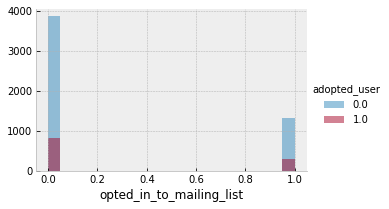

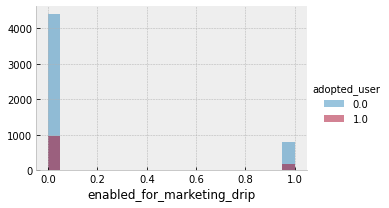

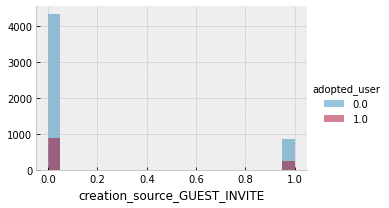

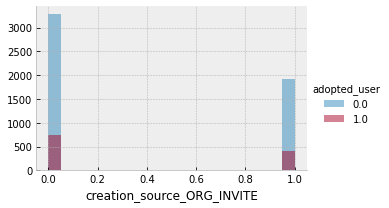

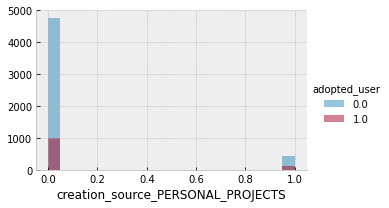

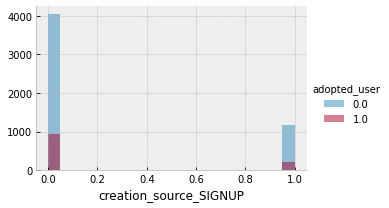

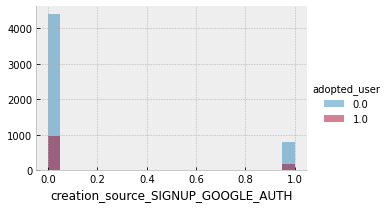

In [49]:
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source_GUEST_INVITE',
           'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
           'creation_source_SIGNUP_GOOGLE_AUTH']:
    g = sns.FacetGrid(df_takehome_user, hue = "adopted_user", height=3, aspect=1.5,)
    g.map(plt.hist, col, alpha=.5, bins = 20)
    g.add_legend()        

KeyError: ignored

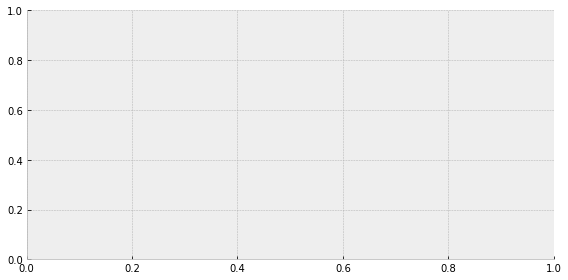

In [50]:
g = sns.FacetGrid(df_takehome_user, hue = "adopted_user", height=4, aspect=2,)
g.map(plt.hist, 'days_since_creation', alpha=0.8, bins = 20)
g.add_legend() 
#sns.distplot(df_users['days_since_creation'], kde = False, bins = 20, hue = 'adopted_user')



In [ ]:
df_takehome_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  int64  
 4   adopted_user                        6349 non-null   float64
 5   days_since_creation                 12000 non-null  int64  
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
dtypes: float64(1), int64(5), uint8(5)
memory 

In [ ]:
X = df_takehome_user.loc[:,df_takehome_user.columns[1:]]
y = df_takehome_user['adopted_user'].values




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = pd.DataFrame(scaler.fit_transform(X_train))
#scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#df_takehome_user.dropna()
conversion = {"adopted_user" : "int64"}
df_takehome_user = df_takehome_user.astype(conversion, )
conversion = {"creation_time" : "datetime64[ns]",
              "last_session_creation_time" : "datetime64[ns]",
              "invited_by_user_id" : "int64"
              }
takehome_user = takehome_user.astype(conversion, errors = "ignore")



ValueError: ignored

In [ ]:
df_takehome_user= np.nan_to_num(df_takehome_user.astype(np.float32))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred
print(y_pred[0:5])



ValueError: ignored